In [52]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

import statistics as stats

In [19]:
al = '..//Data//out.moreno_crime_crime'
gender = '..//Data//ent.moreno_crime_crime.person.sex'
name = '..//Data//ent.moreno_crime_crime.person.name'
role = '..//Data//rel.moreno_crime_crime.person.role'

In [68]:
al_df = pd.read_csv(al, sep=" ", names=['person', 'crime'], index_col=False)
al_df['person'] = 'p' + al_df['person'].astype(str)
al_df['crime'] = 'c' + al_df['crime'].astype(str)
al_df

,person,crime
0,p1,c1
1,p1,c2
2,p1,c3
3,p1,c4
4,p2,c5
...,...,...
1471,p825,c399
1472,p826,c300
1473,p827,c265
1474,p828,c298


In [21]:
gender_df = pd.read_csv(gender, sep=" ", header=None)
gender_df.head(3)
gender_df.shape

(829, 1)

In [22]:
name_df = pd.read_csv(name, sep=" ", header=None)
name_df.head(3)
name_df.shape

(829, 1)

In [23]:
role_df = pd.read_csv(role, sep=",", header=None)
role_df.head(3)
role_df[0][2]
role_df.shape

(1476, 1)

In [24]:
people = al_df['person'].unique()
crimes = al_df['crime'].unique()

In [25]:
len(people)

829

In [26]:

# create networkx graph
G=nx.Graph()

# # add nodes
for i in range(len(people)):
    G.add_node(people[i], name=name_df[0][i], gender=gender_df[0][i], bipartite=0)

for i in range(len(crimes)):
    G.add_node(crimes[i], bipartite=1)

# # add edges
for i in range(len(al_df)):
    G.add_edge(al_df['person'][i], al_df['crime'][i], role=role_df[0][i])

In [27]:
print(
    'Num. of nodes: {} \nNum. of edges: {} \nIs bipartite? {} \nIs connected? {}'.format(
        G.number_of_nodes(), 
        G.number_of_edges(), 
        nx.is_bipartite(G),
        nx.is_connected(G)
        )
    )

Num. of nodes: 1380 
Num. of edges: 1476 
Is bipartite? True 
Is connected? False


In [28]:
nx.get_edge_attributes(G, 'role')
# nx.get_node_attributes(G, 'name')

{('p1', 'c1'): 'Suspect',
 ('p1', 'c2'): 'Victim',
 ('p1', 'c3'): 'Victim',
 ('p1', 'c4'): 'Suspect',
 ('p2', 'c5'): 'Victim',
 ('p2', 'c6'): 'Suspect',
 ('p2', 'c7'): 'Victim',
 ('p2', 'c8'): 'Suspect',
 ('p2', 'c9'): 'Suspect',
 ('p2', 'c10'): 'Suspect',
 ('p2', 'c11'): 'Suspect',
 ('p2', 'c12'): 'Suspect',
 ('p2', 'c13'): 'Suspect',
 ('p2', 'c14'): 'Witness',
 ('p2', 'c15'): 'Suspect',
 ('p2', 'c16'): 'Suspect',
 ('p2', 'c17'): 'Suspect',
 ('p2', 'c18'): 'Suspect',
 ('p2', 'c19'): 'Victim',
 ('p2', 'c20'): 'Suspect',
 ('p2', 'c21'): 'Suspect',
 ('p2', 'c22'): 'Suspect',
 ('p2', 'c23'): 'Victim',
 ('p2', 'c24'): 'Suspect',
 ('p2', 'c25'): 'Suspect',
 ('p2', 'c26'): 'Suspect',
 ('p3', 'c27'): 'Suspect',
 ('p4', 'c24'): 'Suspect',
 ('p5', 'c19'): 'Victim',
 ('p6', 'c28'): 'Victim',
 ('p7', 'c29'): 'Suspect',
 ('p8', 'c30'): 'Suspect',
 ('p9', 'c31'): 'Victim',
 ('p10', 'c32'): 'Victim',
 ('p10', 'c33'): 'Victim',
 ('p10', 'c34'): 'Victim Suspect',
 ('p10', 'c35'): 'Suspect',
 ('p10', '

In [32]:
for e in G.edges(data=True):
    print(e)

('p1', 'c1', {'role': 'Suspect'})
('p1', 'c2', {'role': 'Victim'})
('p1', 'c3', {'role': 'Victim'})
('p1', 'c4', {'role': 'Suspect'})
('p2', 'c5', {'role': 'Victim'})
('p2', 'c6', {'role': 'Suspect'})
('p2', 'c7', {'role': 'Victim'})
('p2', 'c8', {'role': 'Suspect'})
('p2', 'c9', {'role': 'Suspect'})
('p2', 'c10', {'role': 'Suspect'})
('p2', 'c11', {'role': 'Suspect'})
('p2', 'c12', {'role': 'Suspect'})
('p2', 'c13', {'role': 'Suspect'})
('p2', 'c14', {'role': 'Witness'})
('p2', 'c15', {'role': 'Suspect'})
('p2', 'c16', {'role': 'Suspect'})
('p2', 'c17', {'role': 'Suspect'})
('p2', 'c18', {'role': 'Suspect'})
('p2', 'c19', {'role': 'Victim'})
('p2', 'c20', {'role': 'Suspect'})
('p2', 'c21', {'role': 'Suspect'})
('p2', 'c22', {'role': 'Suspect'})
('p2', 'c23', {'role': 'Victim'})
('p2', 'c24', {'role': 'Suspect'})
('p2', 'c25', {'role': 'Suspect'})
('p2', 'c26', {'role': 'Suspect'})
('p3', 'c27', {'role': 'Suspect'})
('p4', 'c24', {'role': 'Suspect'})
('p5', 'c19', {'role': 'Victim'})
(

From the official Networkx docs: https://networkx.org/documentation/stable/reference/algorithms/bipartite.html

Many algorithms of the bipartite module of NetworkX require, as an argument, a container with all the nodes that belong to one set, in addition to the bipartite graph B. The functions in the bipartite package do not check that the node set is actually correct nor that the input graph is actually bipartite. If B is connected, you can find the two node sets using a two-coloring algorithm:

```py
>>> nx.is_connected(B)
True
>>> bottom_nodes, top_nodes = bipartite.sets(B)
```
However, if the input graph is not connected, there are more than one possible colorations. This is the reason why we require the user to pass a container with all nodes of one bipartite node set as an argument to most bipartite functions. In the face of ambiguity, we refuse the temptation to guess and raise an AmbiguousSolution Exception if the input graph for bipartite.sets is disconnected.

Using the bipartite node attribute, you can easily get the two node sets:

In [29]:
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

In [69]:
top_nodes

{'p1',
 'p10',
 'p100',
 'p101',
 'p102',
 'p103',
 'p104',
 'p105',
 'p106',
 'p107',
 'p108',
 'p109',
 'p11',
 'p110',
 'p111',
 'p112',
 'p113',
 'p114',
 'p115',
 'p116',
 'p117',
 'p118',
 'p119',
 'p12',
 'p120',
 'p121',
 'p122',
 'p123',
 'p124',
 'p125',
 'p126',
 'p127',
 'p128',
 'p129',
 'p13',
 'p130',
 'p131',
 'p132',
 'p133',
 'p134',
 'p135',
 'p136',
 'p137',
 'p138',
 'p139',
 'p14',
 'p140',
 'p141',
 'p142',
 'p143',
 'p144',
 'p145',
 'p146',
 'p147',
 'p148',
 'p149',
 'p15',
 'p150',
 'p151',
 'p152',
 'p153',
 'p154',
 'p155',
 'p156',
 'p157',
 'p158',
 'p159',
 'p16',
 'p160',
 'p161',
 'p162',
 'p163',
 'p164',
 'p165',
 'p166',
 'p167',
 'p168',
 'p169',
 'p17',
 'p170',
 'p171',
 'p172',
 'p173',
 'p174',
 'p175',
 'p176',
 'p177',
 'p178',
 'p179',
 'p18',
 'p180',
 'p181',
 'p182',
 'p183',
 'p184',
 'p185',
 'p186',
 'p187',
 'p188',
 'p189',
 'p19',
 'p190',
 'p191',
 'p192',
 'p193',
 'p194',
 'p195',
 'p196',
 'p197',
 'p198',
 'p199',
 'p2',
 'p20'

# Graphing

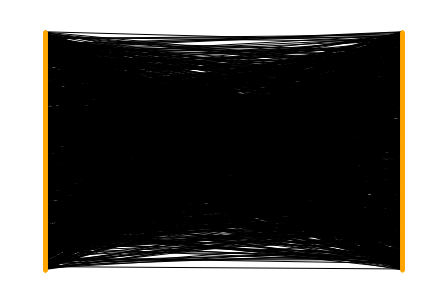

In [33]:
options = {
    'node_color': 'orange',
    'node_size': 10,
    # 'width': 3,
    'edge_color': 'black', 
    'linewidths': 1, 
    'font_size': 8,
    'with_labels': False
}

pos=nx.bipartite_layout(G, top_nodes)
nx.draw(G, pos, **options)

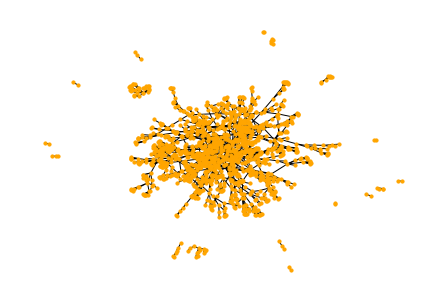

In [34]:
options = {
    'node_color': 'orange',
    'node_size': 10,
    'edge_color': 'black', 
    'linewidths': 1, 
    'font_size': 8,
    'with_labels': False
}

# Get the edge labels for ratings
edge_labels = nx.get_edge_attributes(G, 'role')
# edge_labels

# pos=nx.bipartite_layout(G, top_nodes)
# nx.draw(G,pos, **options)


pos=nx.spring_layout(G)
nx.draw(G, pos, **options)
# Draw the edge labels
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

In [41]:
nx.get_node_attributes(G, 'bipartite').values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Stats

In [74]:
bipartite.density(G, top_nodes)

0.0032313219302988975

In [59]:
bipartite.average_clustering(G)

0.42747513026061823

In [73]:
clustering = bipartite.clustering(G)
clustering

{'p1': 0.20833333333333334,
 'p2': 0.05097331699584503,
 'p3': 0.14285714285714285,
 'p4': 0.7922077922077921,
 'p5': 0.7922077922077921,
 'p6': 0.6587301587301587,
 'p7': 0.8333333333333333,
 'p8': 0.8333333333333334,
 'p9': 0.5476190476190476,
 'p10': 0.1260783858998145,
 'p11': 0.5476190476190476,
 'p12': 0.29261363636363635,
 'p13': 0.7777777777777777,
 'p14': 0.7777777777777777,
 'p15': 0.7222222222222222,
 'p16': 0.8333333333333334,
 'p17': 0.14966681626164383,
 'p18': 0.8055555555555555,
 'p19': 0.7000000000000001,
 'p20': 0.7000000000000001,
 'p21': 0.3541666666666667,
 'p22': 0.3333333333333333,
 'p23': 0.175,
 'p24': 0.85,
 'p25': 0.85,
 'p26': 0.7777777777777777,
 'p27': 0.41666666666666663,
 'p28': 0.1574074074074074,
 'p29': 0.8571428571428571,
 'p30': 0.8333333333333333,
 'p31': 0.725,
 'p32': 0.8333333333333334,
 'p33': 0.09090909090909091,
 'p34': 0.16666666666666666,
 'p35': 0.8333333333333334,
 'p36': 0.5416666666666666,
 'p37': 0.13524305555555555,
 'p38': 0.55,
 'p3

In [71]:
vals_cc = bipartite.closeness_centrality(G, top_nodes)

In [63]:
print(
    'Closeness centrality \nMax : {} \nMin: {} \nMean: {} \nMedian: {}'.format(
        max(vals_cc, key=vals_cc.get),
        min(vals_cc, key=vals_cc.get),
        stats.mean(vals_cc.values()),
        stats.median(vals_cc.values())
        )
    )

    # why min is a crime?? using top nodes

Closeness centrality 
Max : p141 
Min: c346 
Mean: 0.17864432443679573 
Median: 0.12189861788515904


In [64]:
vals_bc = bipartite.betweenness_centrality(G, top_nodes)

In [66]:
print(
    'Betweenness centrality \nMax : {} \nMin: {} \nMean: {} \nMedian: {}'.format(
        max(vals_bc, key=vals_bc.get),
        min(vals_bc, key=vals_bc.get),
        stats.mean(vals_bc.values()),
        stats.median(vals_bc.values())
        )
    )

Betweenness centrality 
Max : p815 
Min: p3 
Mean: 0.007274471808781837 
Median: 0.0
